In [7]:
%reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
data = pd.read_csv('../Data/BPM_B1_formatted.txt',sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1534475788,-0.114,-0.035,-1.063,-0.024,-1.353,-1.518,-1.321,-1.025,0.254,-0.879,0.341,0.049,-1.138,-1.413,0.088,-1.494,-0.411,-0.820
1,1534475900,-0.062,-0.134,-0.786,-0.088,-1.211,-1.638,-1.044,-0.986,0.294,-0.837,0.301,0.101,-1.127,-1.339,0.204,-1.436,-0.358,-0.765
2,1534476235,-0.146,0.082,-1.066,0.090,-1.405,-1.392,-1.333,-0.891,0.286,-0.774,0.346,-0.035,-1.098,-1.444,0.073,-1.414,-0.433,-0.730
3,1534476421,-0.104,-0.037,-0.872,-0.020,-1.259,-1.500,-1.106,-0.912,0.269,-0.762,0.311,0.023,-1.143,-1.347,0.132,-1.396,-0.379,-0.668
4,1534476644,-0.014,-0.008,-0.859,0.053,-1.343,-1.365,-1.211,-0.913,0.224,-0.740,0.250,0.025,-0.971,-1.447,0.268,-1.489,-0.406,-0.696


In [7]:
data[0][:20]

0     1534475788
1     1534475900
2     1534476235
3     1534476421
4     1534476644
5     1534476718
6     1534476830
7     1534476904
8     1534477314
9     1534477388
10    1534477462
11    1534477611
12    1534477760
13    1534477834
14    1534478020
15    1534478058
16    1534478132
17    1534478206
18    1534478281
19    1534478355
Name: 0, dtype: int64

Convert the -999's and 0's to Nan's and remove them

In [10]:
data = data.replace(-999,np.nan)
data = data.replace(0,np.nan)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1894
Data columns (total 19 columns):
0     1420 non-null float64
1     1420 non-null float64
2     1420 non-null float64
3     1420 non-null float64
4     1420 non-null float64
5     1420 non-null float64
6     1420 non-null float64
7     1420 non-null float64
8     1420 non-null float64
9     1420 non-null float64
10    1420 non-null float64
11    1420 non-null float64
12    1420 non-null float64
13    1420 non-null float64
14    1420 non-null float64
15    1420 non-null float64
16    1420 non-null float64
17    1420 non-null float64
18    1420 non-null float64
dtypes: float64(19)
memory usage: 221.9 KB


In [29]:
data.iloc[0][1].mean()
#len(data.columns)


-0.114

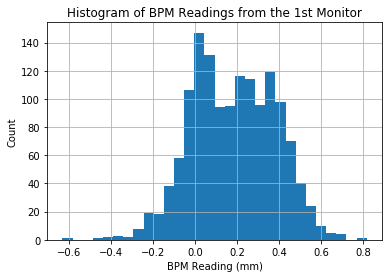

In [11]:
plt.figure()
data[1].hist(bins=30)
plt.title('Histogram of BPM Readings from the 1st Monitor')
plt.xlabel('BPM Reading (mm)')
plt.ylabel('Count')
plt.savefig('../Dissertation/images/Histogram_of_BPM')

In [12]:
def get_mse(row):
    regression_line = data.iloc[0]
    mse = []
    for i in range(1,len(row)):
        mse.append((regression_line[i]-row[i])**2)
    return np.mean(mse)

In [31]:
get_mse(data.iloc[1])

0.01344794444444445

Apply Function on each row:

In [13]:
data['MSE'] = data.apply(lambda row: get_mse(row), axis=1)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,MSE
0,1.534476e+09,-0.114,-0.035,-1.063,-0.024,-1.353,-1.518,-1.321,-1.025,0.254,-0.879,0.341,0.049,-1.138,-1.413,0.088,-1.494,-0.411,-0.820,0.000000
1,1.534476e+09,-0.062,-0.134,-0.786,-0.088,-1.211,-1.638,-1.044,-0.986,0.294,-0.837,0.301,0.101,-1.127,-1.339,0.204,-1.436,-0.358,-0.765,0.013448
2,1.534476e+09,-0.146,0.082,-1.066,0.090,-1.405,-1.392,-1.333,-0.891,0.286,-0.774,0.346,-0.035,-1.098,-1.444,0.073,-1.414,-0.433,-0.730,0.005628
3,1.534476e+09,-0.104,-0.037,-0.872,-0.020,-1.259,-1.500,-1.106,-0.912,0.269,-0.762,0.311,0.023,-1.143,-1.347,0.132,-1.396,-0.379,-0.668,0.008905
4,1.534477e+09,-0.014,-0.008,-0.859,0.053,-1.343,-1.365,-1.211,-0.913,0.224,-0.740,0.250,0.025,-0.971,-1.447,0.268,-1.489,-0.406,-0.696,0.011799


In [15]:
data = data.rename(columns={0:'Time Stamp'})

In [16]:
condition = data['MSE'] > 0.7
condition2 = data['MSE'] <= 0.7
new_data = data[condition]
new_data.head()

#data = data[condition2]

,Time Stamp,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,MSE
1648,1.539552e+09,-0.3,1.368,-1.963,1.13,-2.269,-0.009,-2.76,-0.101,-0.682,-0.029,0.099,-1.023,0.574,-1.722,-0.719,-1.026,-1.151,0.107,1.016407


Text(0.5,1,'MSE of Beam Positions in the TL')

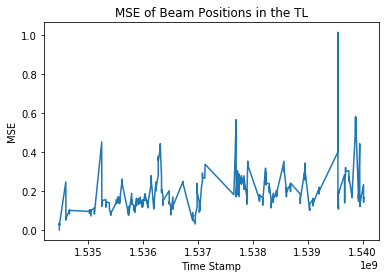

In [17]:
fig = plt.figure()
plt.plot(data['Time Stamp'],data['MSE'])
plt.xlabel('Time Stamp')
plt.ylabel('MSE')
plt.title('MSE of Beam Positions in the TL')

##### Some Time Series Analysis

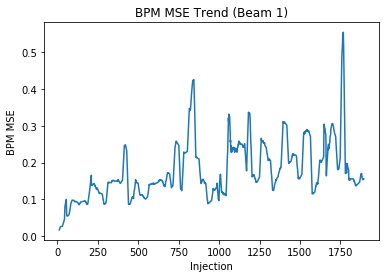

In [32]:
plt.figure()
data['MSE'].rolling(12).mean().plot()
plt.title('BPM MSE Trend (Beam 1)')
plt.xlabel('Injection')
plt.ylabel('BPM MSE')
plt.savefig('../Dissertation/images/BPM_MSE_Trend_B1')

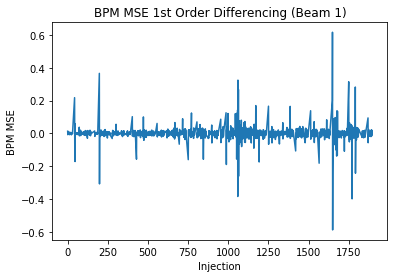

In [36]:
plt.figure()
data['MSE'].diff().plot()
plt.title('BPM MSE 1st Order Differencing (Beam 1)')
plt.xlabel('Injection')
plt.ylabel('BPM MSE')
plt.savefig('../Dissertation/images/BPM_MSE_Diff_B1')

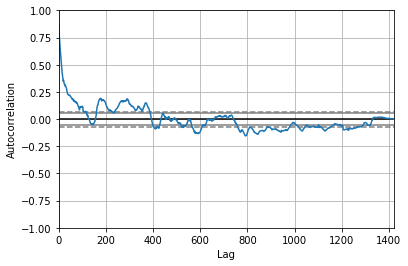

In [35]:
pd.plotting.autocorrelation_plot(data['MSE'])

In [37]:
data.to_pickle('../Data/Beam1_TL_BPM.pkl')

## Same thing for TI8:

In [21]:
dataB2 = pd.read_csv('../Data/BPM_B2_formatted.txt',sep='\t', header=None)
dataB2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1534475826,-0.309,1.716,0.349,0.999,-0.028,0.528,0.183,-0.415,-1.164,0.774,-0.029,0.771,-0.570,0.313,-0.164,-0.422,-0.164,-0.422
1,1534475937,-0.316,1.542,0.421,0.851,0.041,0.431,0.261,-0.398,-1.202,0.704,0.002,0.646,-0.406,0.253,-0.138,-0.468,-0.138,-0.468
2,1534476309,-0.341,1.545,0.342,1.016,0.021,0.740,0.340,-0.310,-1.212,0.611,-0.063,0.690,-0.497,0.403,-0.142,-0.378,-0.142,-0.378
3,1534476458,-0.285,1.523,0.425,1.048,0.065,0.750,0.362,-0.293,-1.215,0.594,-0.008,0.663,-0.256,0.352,-0.056,-0.375,-0.056,-0.375
4,1534476532,-0.300,1.311,0.287,1.056,-0.050,0.930,0.210,-0.234,-1.164,0.419,0.021,0.517,-0.390,0.393,-0.139,-0.273,-0.139,-0.273


In [22]:
dataB2 = dataB2.replace(-999,np.nan)
dataB2 = dataB2.replace(0,np.nan)
dataB2 = dataB2.dropna()
dataB2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1739
Data columns (total 19 columns):
0     1455 non-null float64
1     1455 non-null float64
2     1455 non-null float64
3     1455 non-null float64
4     1455 non-null float64
5     1455 non-null float64
6     1455 non-null float64
7     1455 non-null float64
8     1455 non-null float64
9     1455 non-null float64
10    1455 non-null float64
11    1455 non-null float64
12    1455 non-null float64
13    1455 non-null float64
14    1455 non-null float64
15    1455 non-null float64
16    1455 non-null float64
17    1455 non-null float64
18    1455 non-null float64
dtypes: float64(19)
memory usage: 227.3 KB


In [23]:
def get_mseB2(row):
    regression_line = dataB2.iloc[0]
    mse = []
    for i in range(1,len(row)):
        mse.append((regression_line[i]-row[i])**2)
    return np.mean(mse)

In [24]:
dataB2['MSE'] = dataB2.apply(lambda row: get_mseB2(row), axis=1)

In [25]:
dataB2 = dataB2.rename(columns={0:'Time Stamp'})

In [26]:
condition = dataB2['MSE'] > 0.7
condition2 = dataB2['MSE'] <= 0.7
new_data = dataB2[condition]
new_data.head()

,Time Stamp,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,MSE
1514,1.539552e+09,-1.428,2.042,-2.162,1.302,-1.153,1.276,-1.055,-0.379,-0.098,0.105,0.249,0.617,-0.877,0.528,-0.975,-0.229,-0.975,-0.229,0.796098
1517,1.539552e+09,-1.368,2.122,-2.160,1.324,-1.064,1.276,-0.946,-0.394,-0.142,0.069,0.338,0.617,-0.451,0.552,-0.941,-0.229,-0.941,-0.229,0.758225
1521,1.539553e+09,-1.375,2.107,-2.090,1.324,-1.044,1.288,-0.974,-0.409,-0.134,0.069,0.283,0.636,-0.443,0.584,-0.881,-0.263,-0.881,-0.263,0.729663
1523,1.539562e+09,-1.328,2.129,-2.042,1.379,-1.049,1.246,-0.961,-0.435,-0.153,0.106,0.307,0.661,-0.402,0.601,-0.885,-0.253,-0.885,-0.253,0.707701


Text(0.5,1,'MSE of Beam Positions in the TL')

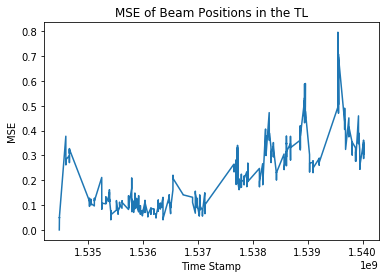

In [27]:
fig = plt.figure()
plt.plot(dataB2['Time Stamp'],dataB2['MSE'])
plt.xlabel('Time Stamp')
plt.ylabel('MSE')
plt.title('MSE of Beam Positions in the TL')

##### Time Series Analysis:

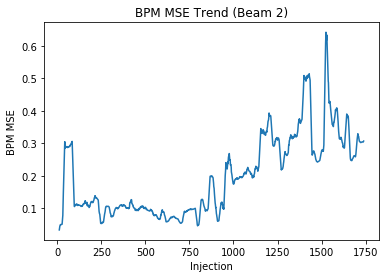

In [33]:
plt.figure()
dataB2['MSE'].rolling(12).mean().plot()
plt.title('BPM MSE Trend (Beam 2)')
plt.xlabel('Injection')
plt.ylabel('BPM MSE')
plt.savefig('../Dissertation/images/BPM_MSE_Trend_B2')

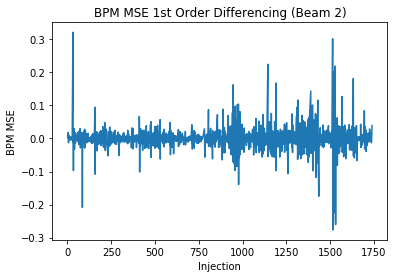

In [38]:
plt.figure()
dataB2['MSE'].diff().plot()
plt.title('BPM MSE 1st Order Differencing (Beam 2)')
plt.xlabel('Injection')
plt.ylabel('BPM MSE')
plt.savefig('../Dissertation/images/BPM_MSE_Diff_B2')

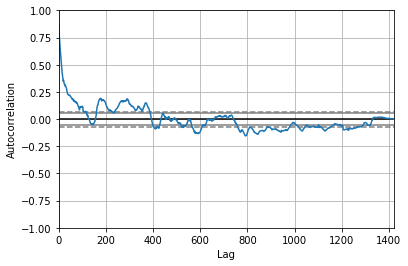

In [39]:
pd.plotting.autocorrelation_plot(data['MSE'])

In [44]:
dataB2.to_pickle('../Data/Beam2_TL_BPM.pkl')